In [1]:
# Manipulacao dos dados
import pandas as pd
import numpy as np

# Criacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

<h1>Carregando e verificando dados</h1>

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape  # Mostrando estrutura do DataFrame

(365, 2)

In [4]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [5]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [6]:
df.tail()  # Mostrando os 5 ultimos dados

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


<h1>Pre-processamento dos dados</h1>

In [7]:
# Vendo valor minimo da coluna data
df['Data'].min()

'2023-01-01'

In [8]:
# Vendo valor maximo da coluna data
df['Data'].max()

'2023-12-31'

In [9]:
# Exibindo informacoes basicas das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
# Contando total de valores nulos da coluna 'Total_Vendas'
df['Total_Vendas'].isnull().sum()

0

In [11]:
# Contando total de valores nulos da coluna 'Data'
df['Data'].isnull().sum()

0

In [12]:
# Trocando tipo da coluna 'Data' para o tipo datetime do python
df['Data'] = pd.to_datetime(df['Data'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


<h1>Criando serie temporal dos dados</h1>

In [14]:
# Convertendo o DataFrame em uma serie temporal com
# a data como indice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [15]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [16]:
# Indicando a frequencia da serie temporal (Diaria neste caso)
serie_temporal = serie_temporal.asfreq('D')  # Diaria

In [17]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

<h1>Analise exploratoria e Formatacao de grafico</h1>

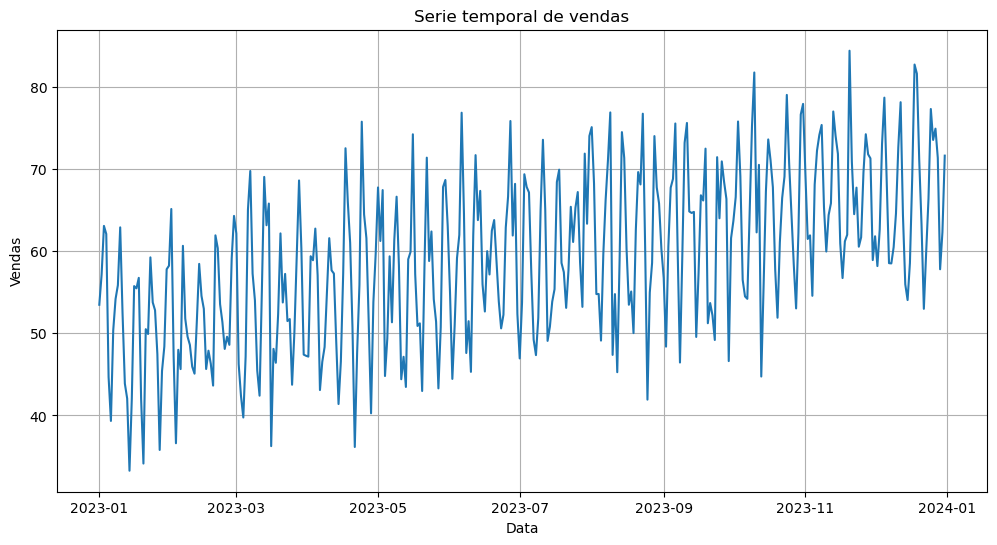

In [18]:
# Criando grafico da serie temporal (unformated)
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Serie temporal de vendas')
plt.grid(True)
plt.show()

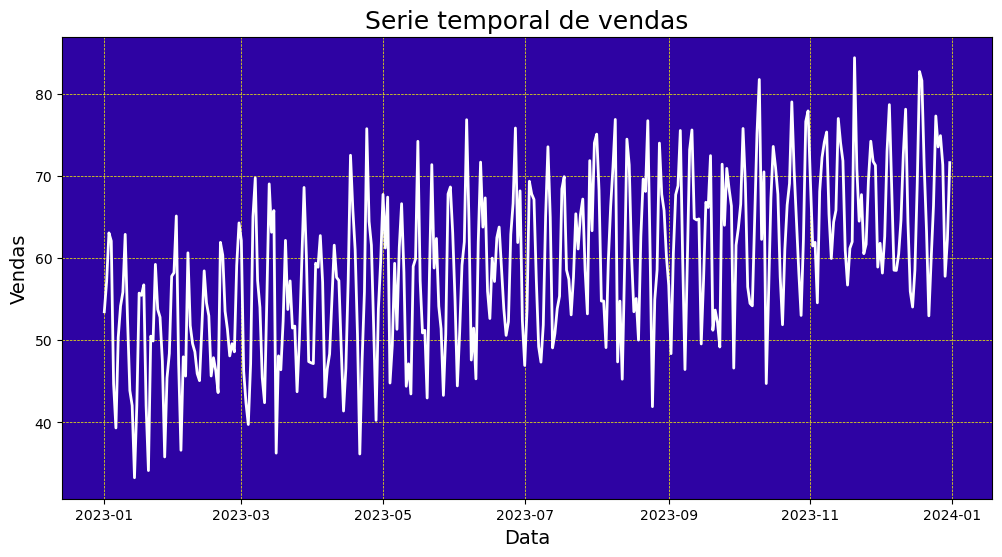

In [19]:
# Criando grafico da serie temporal (formated)

# Cria grafico da s. temporal com contraste
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color='white', linewidth=2)

# Configurando cores e estilo do grafico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color='yellow', linestyle='--', linewidth=0.5)

# Configura rotulos dos eixos e titulo
plt.xlabel('Data', color='black', fontsize=14)
plt.ylabel('Vendas', color='black', fontsize=14)
plt.title('Serie temporal de vendas', color='black', fontsize=18)

# Configura cores dos eixos e dos marcadores
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.show()

<h1>Construcao e treinamento do modelo de suavizacao exponencial</h1>

In [20]:
# Criando instancia utilizando a coluna 'Vendas' da serie_temporal como entrada.
modelo = SimpleExpSmoothing(serie_temporal)

In [21]:
# Treinando modelo e informando suavizacao dos dados
modelo_treinado = modelo.fit(smoothing_level = 0.2)

In [22]:
# Extrai os valores previsto pelo modelo
suavizacao_exponencial = modelo_treinado.fittedvalues

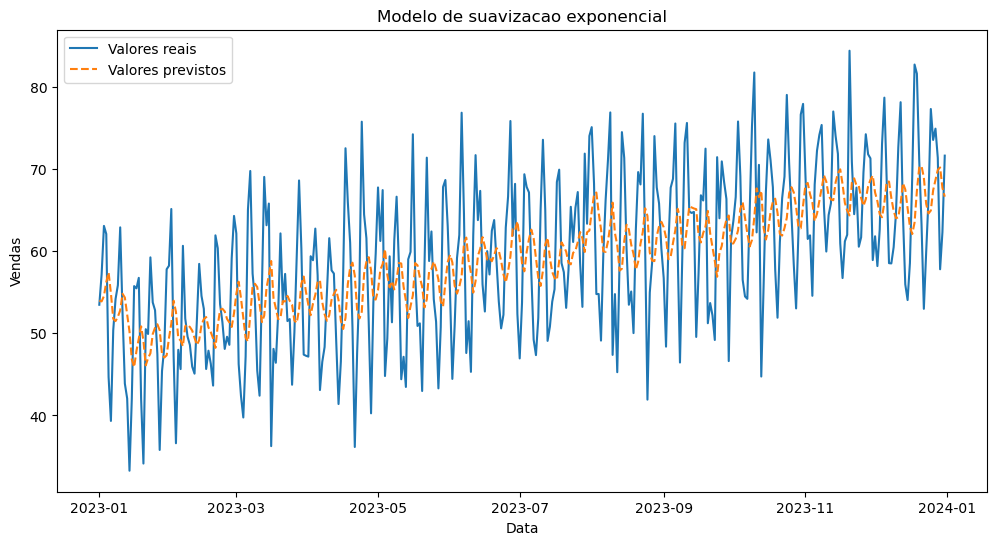

In [23]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores reais')
plt.plot(suavizacao_exponencial, label = 'Valores previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de suavizacao exponencial')
plt.legend()
plt.show()

<h1>Deploy e previsao com o modelo de series temporais</h1>

In [24]:
# Fazendo previsoes
num_previsoes = 1
previsoes = modelo_treinado.forecast(steps = num_previsoes)

In [25]:
print(f'Previsao total de vendas para janeiro de 2024: {round(previsoes[0], 4)}')

Previsao total de vendas para janeiro de 2024: 67.6499
